Part I. Warm Up
1. Reshaping a NumPy Array

In [2]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8])
a_matrix = a.reshape(2, 4)
print(a_matrix)



[[1 2 3 4]
 [5 6 7 8]]


2. PyTorch Tensor Operations

In [3]:
import torch
a = torch.tensor([1, 3, 5, 6])
b = torch.tensor([5, 6, 8, 9])

# Elementwise addition
add_result = a + b
print("a + b =", add_result)

# Elementwise multiplication
mul_result = a * b
print("a * b =", mul_result)

# Elementwise power (a^b for each element)
pow_result = a ** b
print("a^b =", pow_result)

# Dot product of a and b
dot_result = torch.dot(a, b)
print("a·b =", dot_result)

# Dot product of e^a and ln(b)
exp_dot_log = torch.dot(torch.exp(a.to(torch.float32)), torch.log(b.to(torch.float32)))
print("dot(e^a, ln(b)) =", exp_dot_log)


a + b = tensor([ 6,  9, 13, 15])
a * b = tensor([ 5, 18, 40, 54])
a^b = tensor([       1,      729,   390625, 10077696])
a·b = tensor(117)
dot(e^a, ln(b)) = tensor(1235.4036)


3. Autograd Gradient Computations

(a)

In [33]:
# Define the coefficients and variables
coeff = torch.tensor([1., 3., 5., 6.])
point = torch.tensor([5., 6., 8., 9.], requires_grad=True)
# Compute g as dot of coeff and (e^point * point^2)
g_val = torch.dot(coeff, torch.exp(point) * (point**2))
g_val.backward()  # compute gradients
print(point.grad)


tensor([   5194.4609,   58093.7500, 1192383.2500, 4813232.0000])


(b)

In [34]:
A = torch.tensor([[4., 3.],[7., 9.]], requires_grad=True)
B = torch.tensor([[3., 5.],[1., 11.]])

# 计算 f(A) = log(||A^T A B^T A A^T A B||_2^2)
AT = A.T
BT = B.T

# 按照表达式顺序计算
term1 = torch.matmul(AT, A)      # A^T A
term2 = torch.matmul(BT, A)      # B^T A
term3 = torch.matmul(AT, A)      # A^T A
term4 = B                         # B

# 连续矩阵乘法
result = torch.matmul(torch.matmul(torch.matmul(term1, term2), term3), term4)

# 计算L2范数的平方
norm_squared = torch.norm(result, p=2) ** 2

# 取对数
f_A = torch.log(norm_squared)

# 反向传播
f_A.backward()

print("Gradient of f with respect to A:")
print(A.grad)



Gradient of f with respect to A:
tensor([[0.1737, 0.2854],
        [0.3837, 0.6404]])


(c)

In [36]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(7.0, requires_grad=True)
F_val = torch.tanh(x) + torch.tanh(y)
F_val.backward()
print(x.grad.item(), y.grad.item())


0.00986598152667284 3.3378573789377697e-06


4. Tensor to NumPy and Float Conversion

In [37]:
a = torch.tensor([1, 2, 3], dtype=torch.int32)
# Convert to NumPy array
b = a.numpy()
# Convert to float tensor
c = a.float()
print(b, type(b))
print(c, c.dtype)



[1 2 3] <class 'numpy.ndarray'>
tensor([1., 2., 3.]) torch.float32


5. NumPy Matrix Operations

In [39]:
import numpy as np
X = np.array([[1,3,5],[2,1,5]])
Y = np.array([[8,4],[3,6],[2,7]])
print(X.dot(Y))

# Frobenius norm of [100, 2, 1]
vector = np.array([[100, 2, 1]])  # 1x3 matrix
frob_norm = np.linalg.norm(vector, 'fro')
print(f"Frobenius norm: {frob_norm}")

[[27 57]
 [29 49]]
Frobenius norm: 100.024996875781


Part II. The Housing Prices (Kaggle House Prices Competition)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 加载数据
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("--- 训练数据信息 ---")
print(train_df.info())
print("\n--- 训练数据前5行 ---")
print(train_df.head())

print("\n\n--- 测试数据信息 ---")
print(test_df.info())
print("\n--- 测试数据前5行 ---")
print(test_df.head())

--- 训练数据信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

问题 2: 特征类型与分布

Text(0, 0.5, 'Neighborhood')

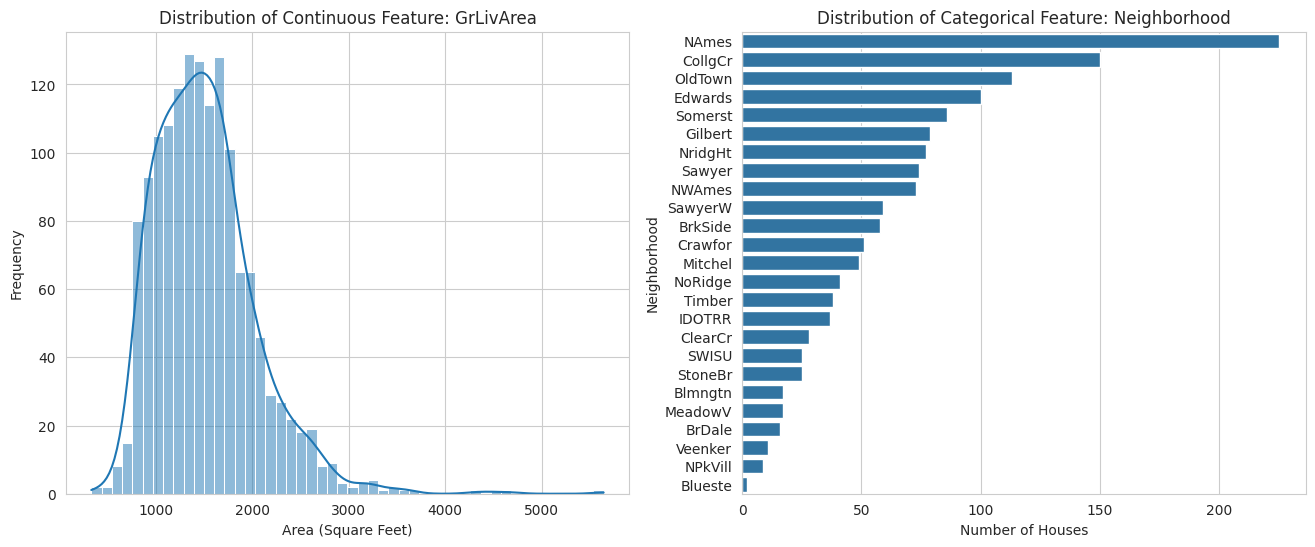

In [47]:
# 设置绘图风格
sns.set_style("whitegrid")

plt.figure(figsize=(16, 6))

# Subplot 1: Distribution of a continuous feature 'GrLivArea'
plt.subplot(1, 2, 1)
sns.histplot(train_df['GrLivArea'], kde=True, bins=50)
plt.title('Distribution of Continuous Feature: GrLivArea')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Frequency')

# Subplot 2: Distribution of a categorical feature 'Neighborhood'
# For categorical features, a bar plot is more appropriate than a histogram.
plt.subplot(1, 2, 2)
sns.countplot(y=train_df['Neighborhood'], order = train_df['Neighborhood'].value_counts().index)
plt.title('Distribution of Categorical Feature: Neighborhood')
plt.xlabel('Number of Houses')
plt.ylabel('Neighborhood')

问题3: 数据预处理

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# 保存ID和目标变量
train_ID = train_df['Id']
test_ID = test_df['Id']
y_train = np.log1p(train_df['SalePrice'])  # 对目标变量进行对数变换

# 删除ID列和SalePrice列，合并数据进行统一预处理
ntrain = train_df.shape[0]
all_data = pd.concat([train_df.drop(['Id', 'SalePrice'], axis=1),
                      test_df.drop('Id', axis=1)], ignore_index=True)

# === 数据预处理 ===

# 1. 填充缺失值
# 具有特定含义的NA（表示"无"）
cols_na_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']
for col in cols_na_none:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna('None')

# 数值型NA填充为0
cols_na_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                'BsmtHalfBath', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'MasVnrArea']
for col in cols_na_zero:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

# LotFrontage按邻里中位数填充
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# 其他分类特征填充为众数
for col in ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
            'Exterior2nd', 'SaleType', 'Functional', 'Utilities']:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0] if len(all_data[col].mode()) > 0 else 'None')

# 2. 特征工程
# 将某些数值型特征转换为分类型
cols_to_str = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for col in cols_to_str:
    if col in all_data.columns:
        all_data[col] = all_data[col].astype(str)

# 对有序分类特征进行标签编码
ordered_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for col in ordered_cols:
    if col in all_data.columns:
        lbl = LabelEncoder()
        all_data[col] = all_data[col].astype(str)
        all_data[col] = lbl.fit_transform(all_data[col])

# 3. 处理数值特征的偏度
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.75]
for col in high_skew.index:
    all_data[col] = np.log1p(all_data[col])






问题4:对名义分类特征进行独热编码

In [49]:
# 4. One-hot编码（只执行一次！）
all_data = pd.get_dummies(all_data)

问题5:

In [50]:
# 5. 分离训练集和测试集
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]

# 填充任何剩余的NaN值
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# === 训练OLS模型 ===
print("训练OLS模型...")
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# 在训练集上评估
y_train_pred = ols_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"\n训练集评估结果：")
print(f"MSE (log scale): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE (original scale): ${np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred))):,.2f}")


训练OLS模型...

训练集评估结果：
MSE (log scale): 0.0085
R² Score: 0.9468
RMSE (original scale): $18,153.82


问题6: 生成提交文件

In [51]:
# === 生成测试集预测 ===
print("\n生成测试集预测...")
test_predictions_log = ols_model.predict(X_test)
test_predictions = np.expm1(test_predictions_log)  # 转换回原始尺度

# 创建提交文件
submission = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': test_predictions
})

# 确保没有负值
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: max(0, x))

# 保存提交文件
submission.to_csv('submission.csv', index=False)

print("\n--- 问题 6: 提交文件生成 ---")
print("提交文件 'submission.csv' 已成功生成")
print(f"文件包含 {len(submission)} 条预测")
print("\n预览前5条记录：")
print(submission.head())
print(f"\n预测价格统计：")
print(f"最小值: ${submission['SalePrice'].min():,.2f}")
print(f"最大值: ${submission['SalePrice'].max():,.2f}")
print(f"平均值: ${submission['SalePrice'].mean():,.2f}")
print(f"中位数: ${submission['SalePrice'].median():,.2f}")


生成测试集预测...

--- 问题 6: 提交文件生成 ---
提交文件 'submission.csv' 已成功生成
文件包含 1459 条预测

预览前5条记录：
     Id      SalePrice
0  1461  125379.858940
1  1462  173174.473549
2  1463  186210.685335
3  1464  199622.824993
4  1465  201942.625838

预测价格统计：
最小值: $36,218.60
最大值: $639,077.44
平均值: $179,022.61
中位数: $158,747.05
